# Lecture 06 - Regression Trees


## Import Needed Libraries

In [1]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
%pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 12.1 MB/s eta 0:00:00
Colab environment detected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_drive_path = "/content/drive/MyDrive/SUNY/Class Material/2024 Fall/MSA550A/Python Class Work/msa550-code-files/data/"

## Read Data

In [4]:
toyotaCorolla_df = pd.read_csv(my_drive_path+'ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Tax', 'Weight']
outcome = 'Price'



## Build a Model

In [5]:
#select only the columns present in the predictors list to include on the mode (also in the get_dummies() process)
X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
#X = toyotaCorolla_df[predictors]
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
    'min_samples_split': [14, 15, 16, 18, 20],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 18}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Look at Summary

In [6]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1036.6131
            Mean Absolute Error (MAE) : 751.9208
          Mean Percentage Error (MPE) : -0.7945
Mean Absolute Percentage Error (MAPE) : 6.6717

Regression statistics

                      Mean Error (ME) : 2.5840
       Root Mean Squared Error (RMSE) : 1394.9455
            Mean Absolute Error (MAE) : 985.8579
          Mean Percentage Error (MPE) : -1.3835
Mean Absolute Percentage Error (MAPE) : 8.6013


## Plot the Tree

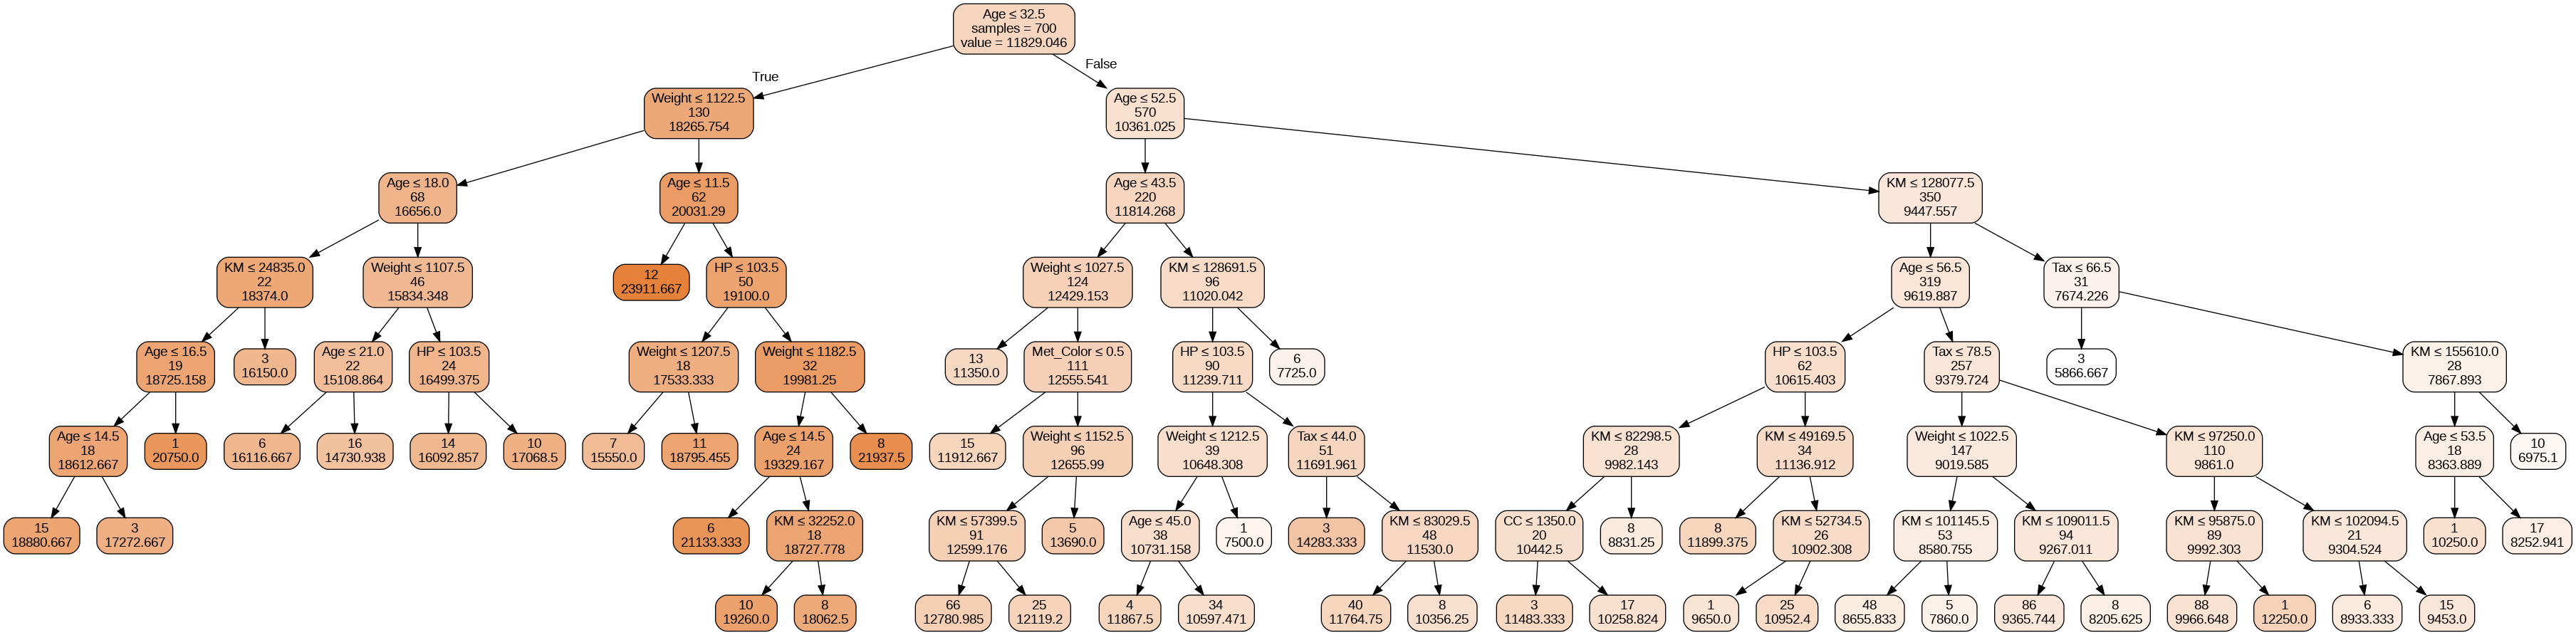

In [7]:
plotDecisionTree(regTree, feature_names=train_X.columns)

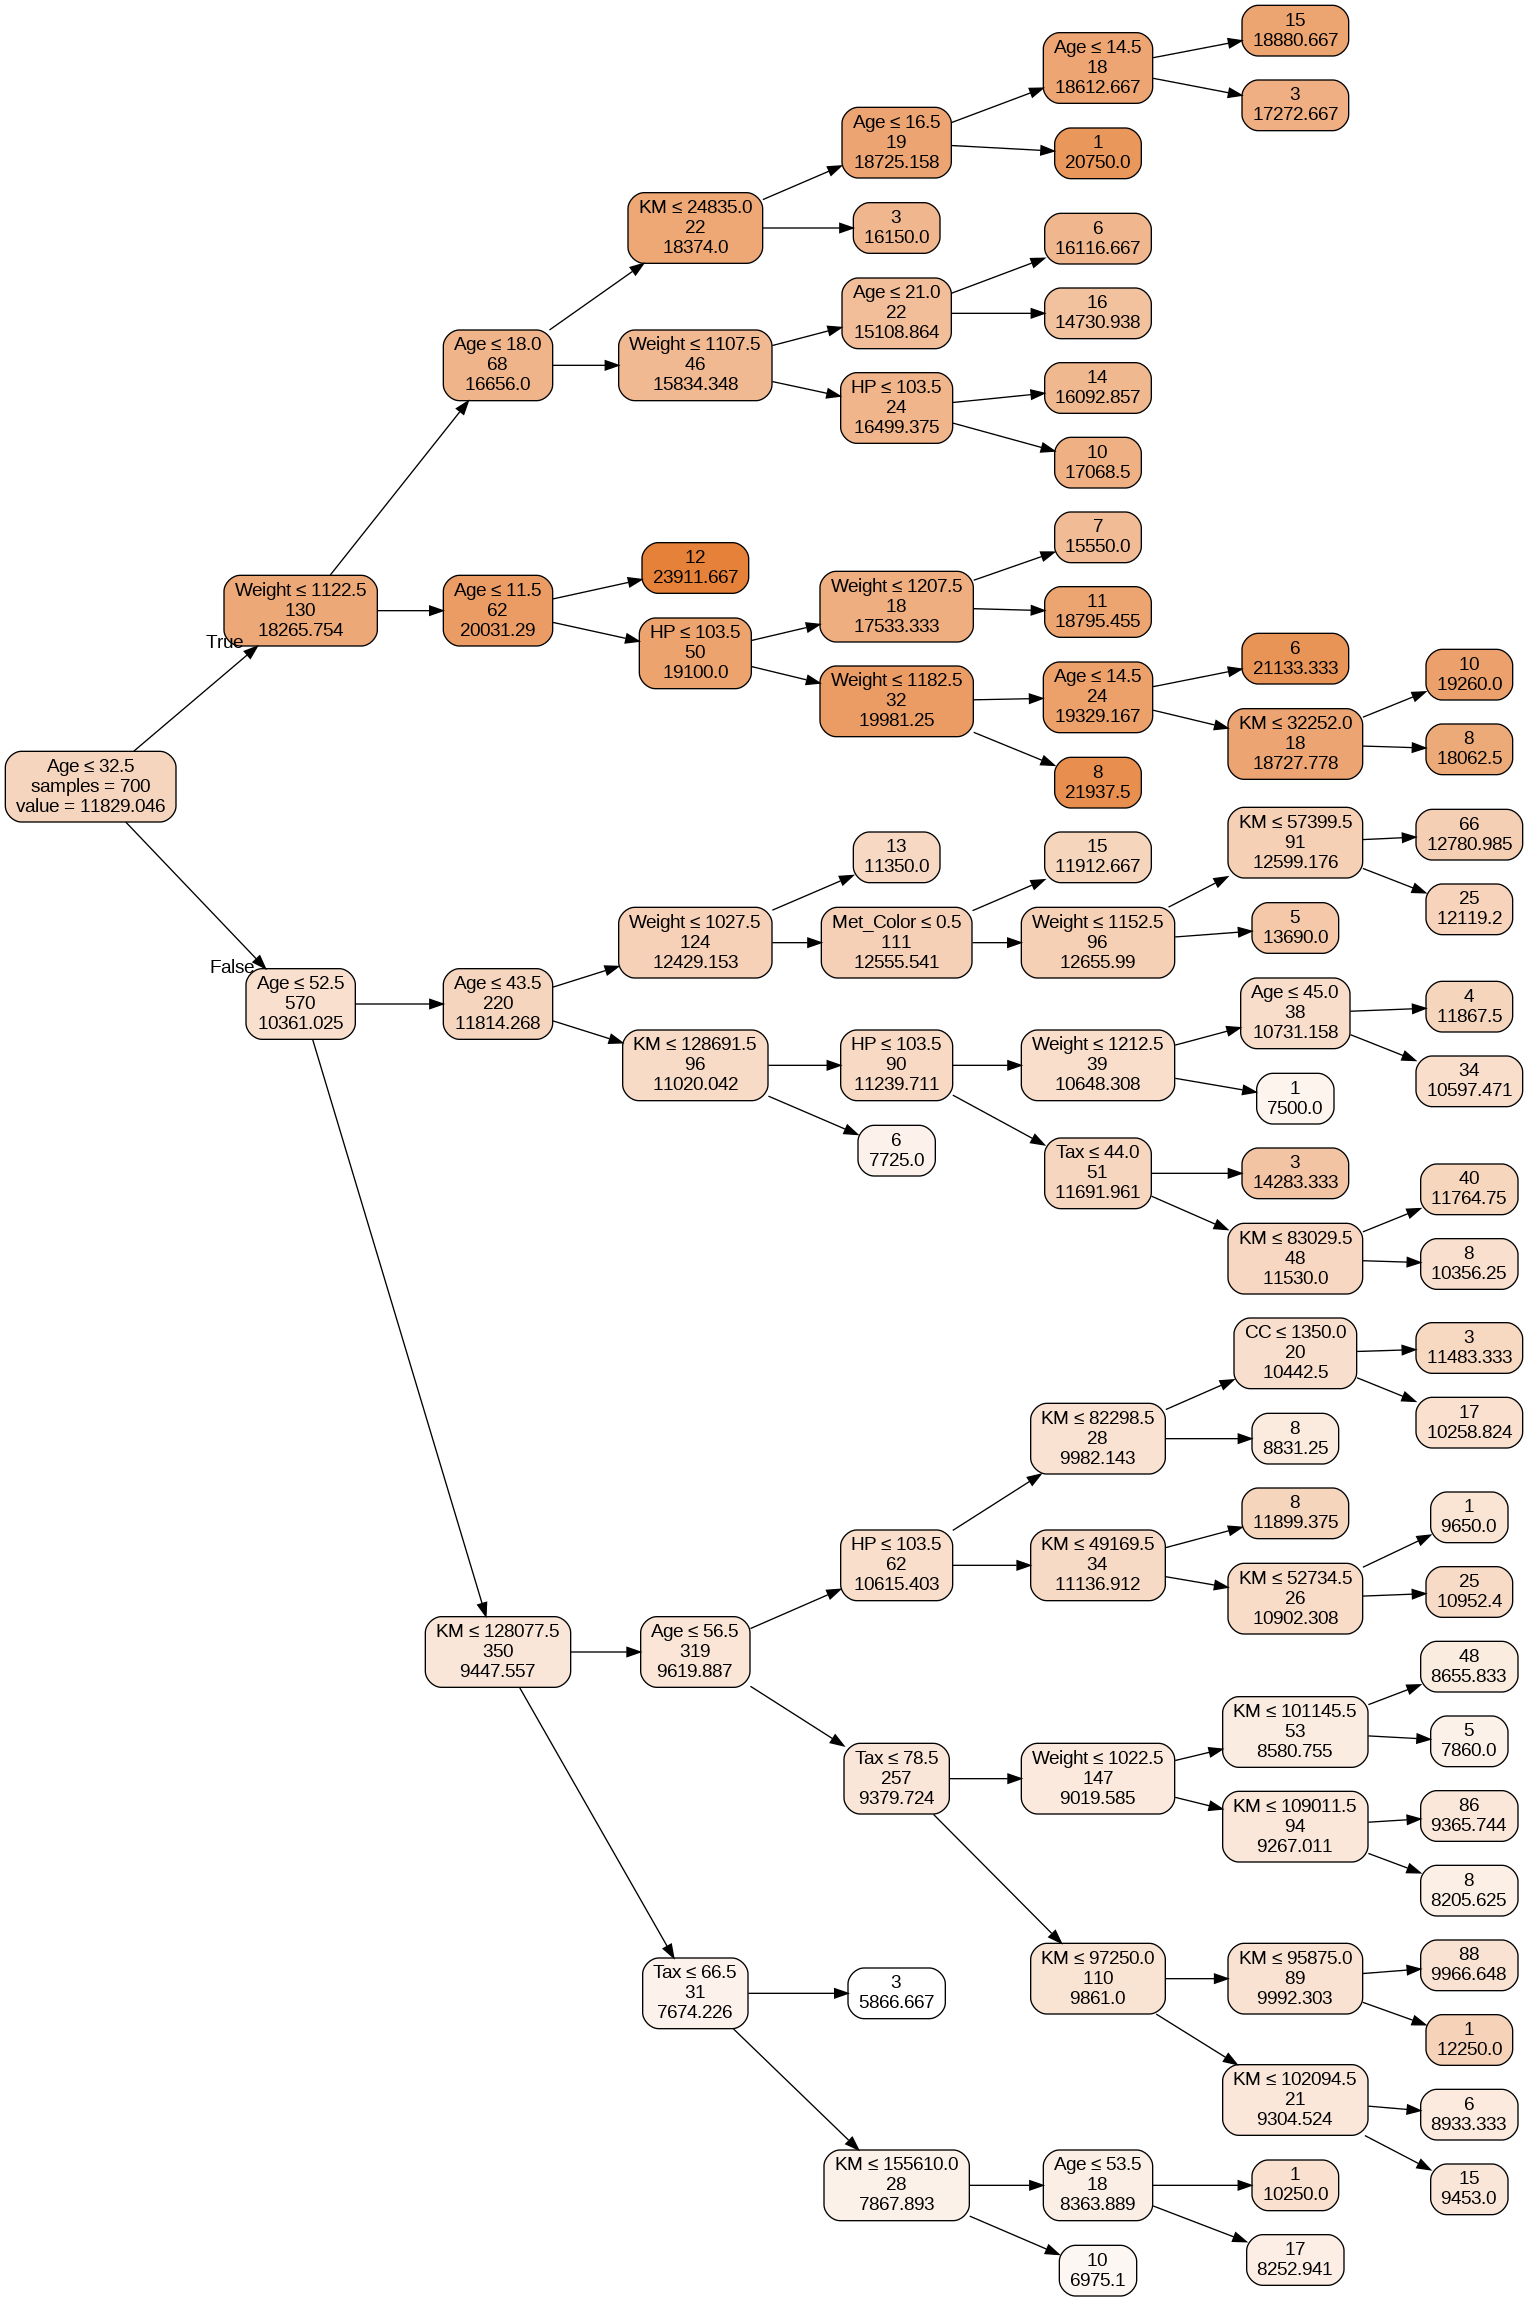

In [8]:
plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)

# Problem 9.3 Predicting Prices of Used Cars (Regression Trees).

The file _ToyotaCorolla.csv_ contains the data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications. (The example in Section 9.7 is a subset of this dataset).

__Data Preprocessing.__ Split the data into training (60%), and validation (40%) datasets.

__9.3.a.__ Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.

__9.3.a.i.__ Which appear to be the three or four most important car specifications for predicting the car’s price?

In [9]:
# Load the data
car_df = pd.read_csv(my_drive_path + 'ToyotaCorolla.csv')

# Select the required columns
columns = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic',
           'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period',
           'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
           'Sport_Model', 'Tow_Bar']

car_df = car_df[columns]

# Convert Fuel_Type to dummy variables
car_df = pd.get_dummies(car_df, drop_first=True)

# Make sure that the result is as expected
car_df.head()

,Price,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,True,False
1,13750,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,True,False
2,13950,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,True,False
3,14950,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,True,False
4,13750,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,True,False


In [10]:
# separate out predictors and outcome variable
X = car_df.drop(columns='Price')
y = car_df['Price']

# partition the data into training (60%) and validiation (40%). Set random_state=1 for reproducibility of results
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (861, 16) Validation set: (575, 16)


In [11]:
# setting random state will ensure that the same tree is produced every time
deepTree = DecisionTreeRegressor(random_state=1)
deepTree.fit(train_X, train_y)

print('Tree has {} nodes'.format(deepTree.tree_.node_count))
plotDecisionTree(deepTree, feature_names=train_X.columns, impurity=False)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns,
                           'importance': deepTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,features,importance
0,Age_08_04,0.844867
2,HP,0.053789
1,KM,0.049601
9,Automatic_airco,0.013358
5,Quarterly_Tax,0.006769
11,Powered_Windows,0.005221
4,Doors,0.004864
8,Airco,0.004727
12,Sport_Model,0.004459
6,Mfr_Guarantee,0.003714


From the regression tree it appears that the most important car specifications to predict the car's price are Age_08_04 (Age in months as of August 2004), HP (Horse Power), KM (accumulated kilometers on odometer) and Automatic_airco (Automatic Airconditioning(Yes=1, No=0)).

__Note:__ It has been pointed out that there is a value in the cc variable - 16,000 - that is probably a data input error. The solutions have been prepared without correcting this error, but a solution that includes correcting this error to 1600 would also be fine. (The data could also be used as a small illustration or exercise of data prep and cleaning.)

__9.3.a.ii.__ Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?
Answer:

__Answer:__

In [13]:
# error report for training and validation sets
print('training set:')
regressionSummary(train_y, deepTree.predict(train_X))
print('\nvalidation set:')
regressionSummary(valid_y, deepTree.predict(valid_X))

training set:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000

validation set:

Regression statistics

                      Mean Error (ME) : 76.6557
       Root Mean Squared Error (RMSE) : 1492.3365
            Mean Absolute Error (MAE) : 1152.4852
          Mean Percentage Error (MPE) : -0.3363
Mean Absolute Percentage Error (MAPE) : 11.3783


The RMSE of the training set is 0 since the tree is as complex as it can be and fully predicts every record. The RMSE of the validation set, which was not involved in the overfitting, is about 1500.

__9.3.a.iii.__ How might we achieve better validation predictive performance at the expense of training performance?

__Answer:__

By limiting tree growth with GridSearchCV, which assesses the performance of many different tree sizes.

__9.3.a.iv.__ Create a smaller tree by using GridSearchCV() with cv=5 to find a fine-tuned tree. Compared to the full-grown tree, what is the predictive performance on the validation set?

Tree has 59 nodes


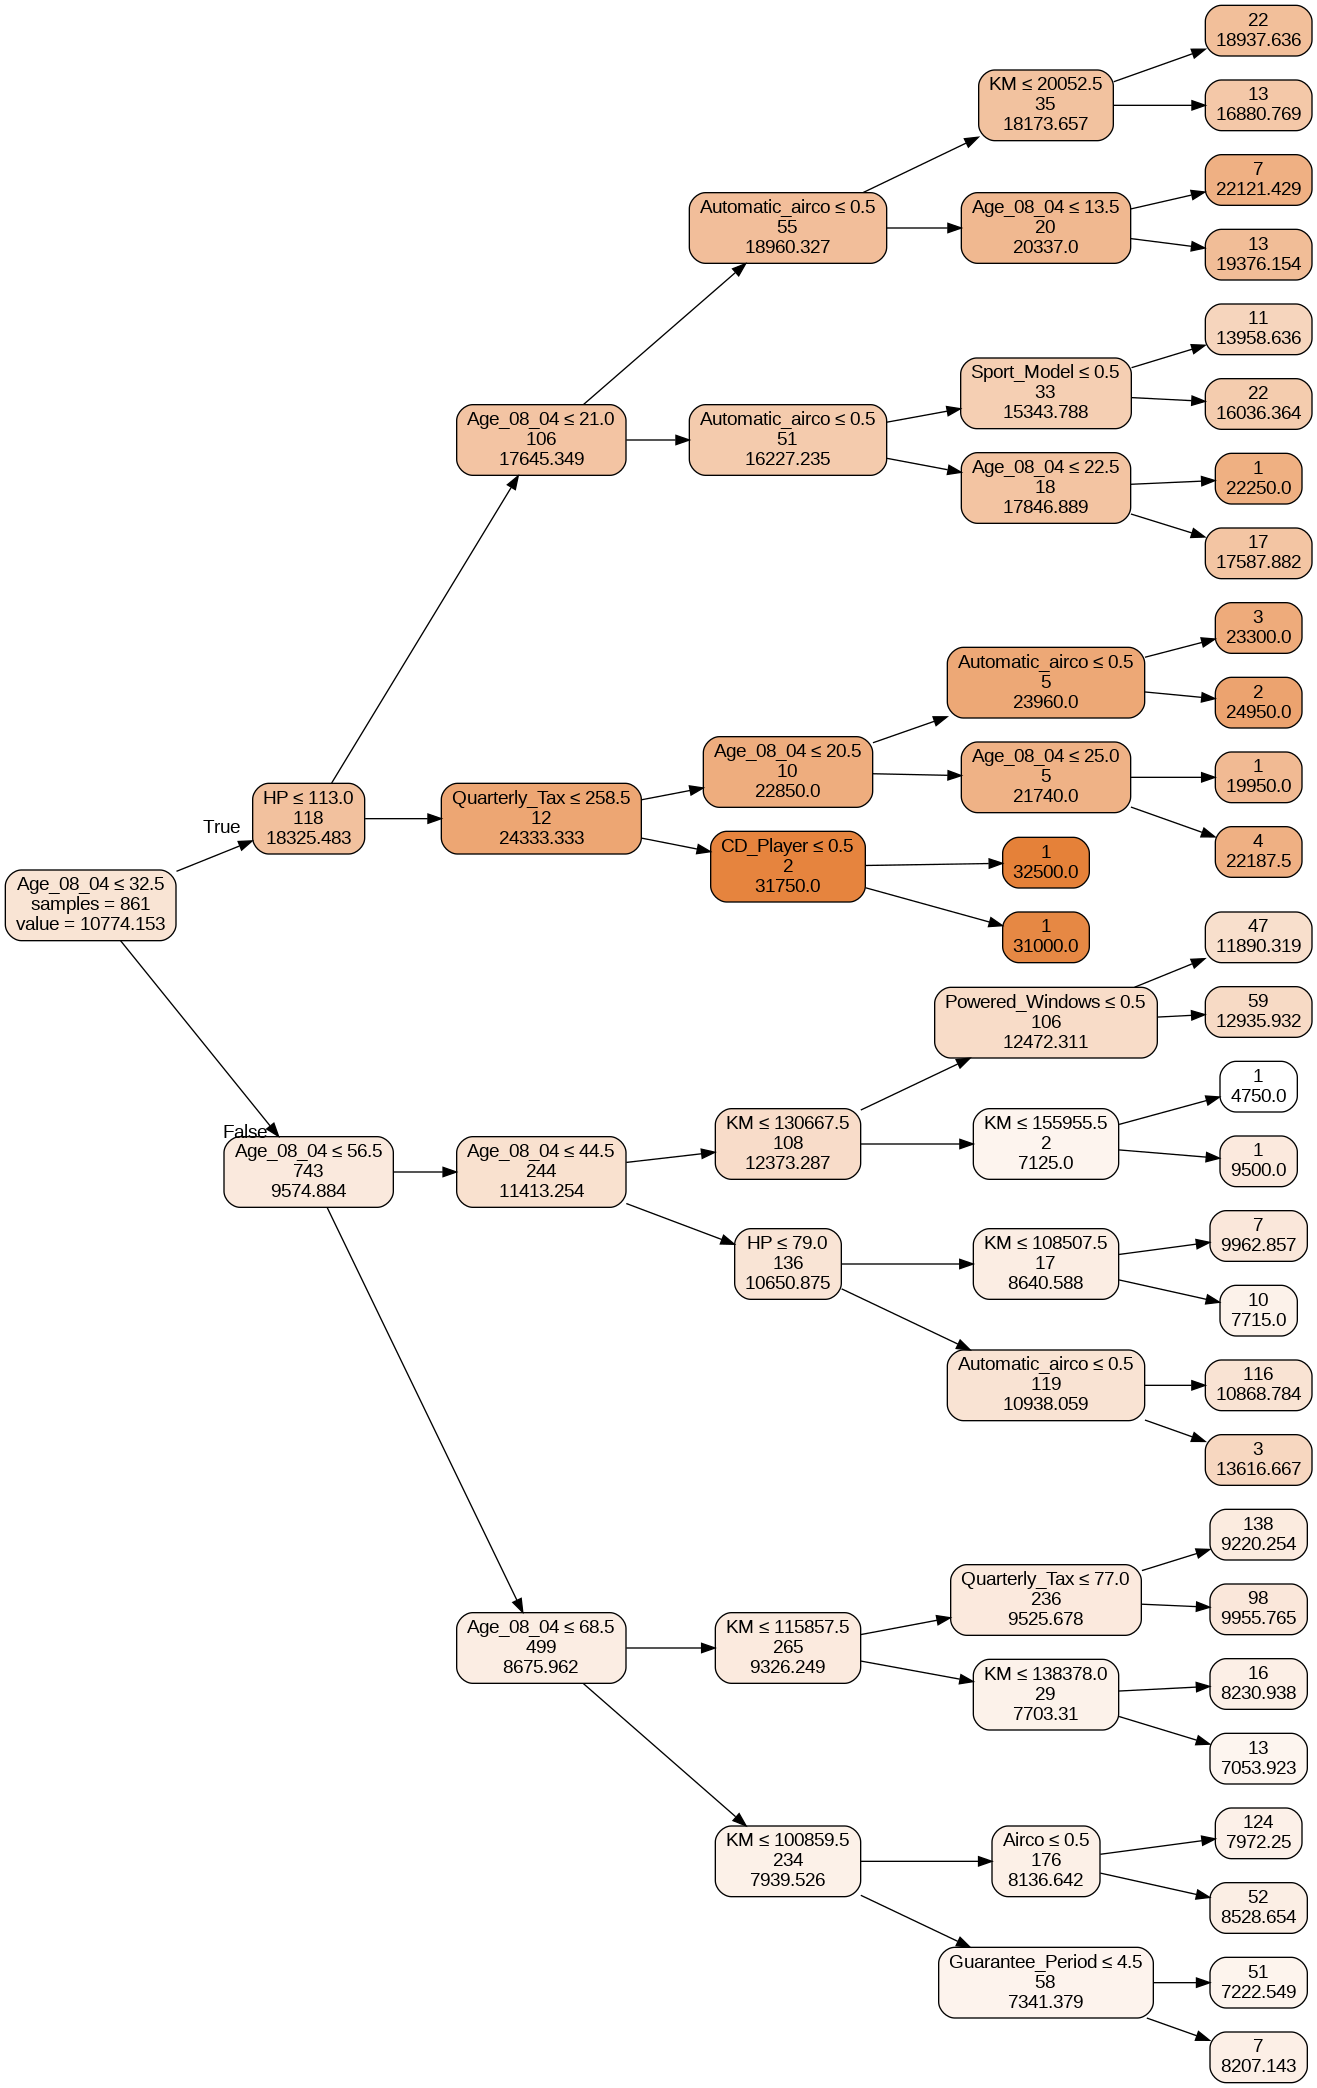

In [14]:
# Before doing full grid search, try a tree of depth = 5
# smaller tree
shallowTree = DecisionTreeRegressor(max_depth=5)
shallowTree.fit(train_X, train_y)
print('Tree has {} nodes'.format(shallowTree.tree_.node_count))
plotDecisionTree(shallowTree, feature_names=train_X.columns, rotate=True, impurity=False)

In [15]:
# error report for training and validation sets
print('training set:')
regressionSummary(train_y, shallowTree.predict(train_X))
print('\nvalidation set:')
regressionSummary(valid_y, shallowTree.predict(valid_X))

training set:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1028.0279
            Mean Absolute Error (MAE) : 773.2770
          Mean Percentage Error (MPE) : -1.0039
Mean Absolute Percentage Error (MAPE) : 7.6715

validation set:

Regression statistics

                      Mean Error (ME) : 45.2335
       Root Mean Squared Error (RMSE) : 1163.0996
            Mean Absolute Error (MAE) : 908.1468
          Mean Percentage Error (MPE) : -0.9856
Mean Absolute Percentage Error (MAPE) : 9.3569


For the shallower tree, the RMSE values of training and validation sets are comparable. Compared to the deep tree, the RMSE of the validation set is lower. This shallower tree does much worse on the training set than the deep tree but does better in predicting rows in the validation set. This indicates a more robust model.

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 21}
Tree has 61 nodes


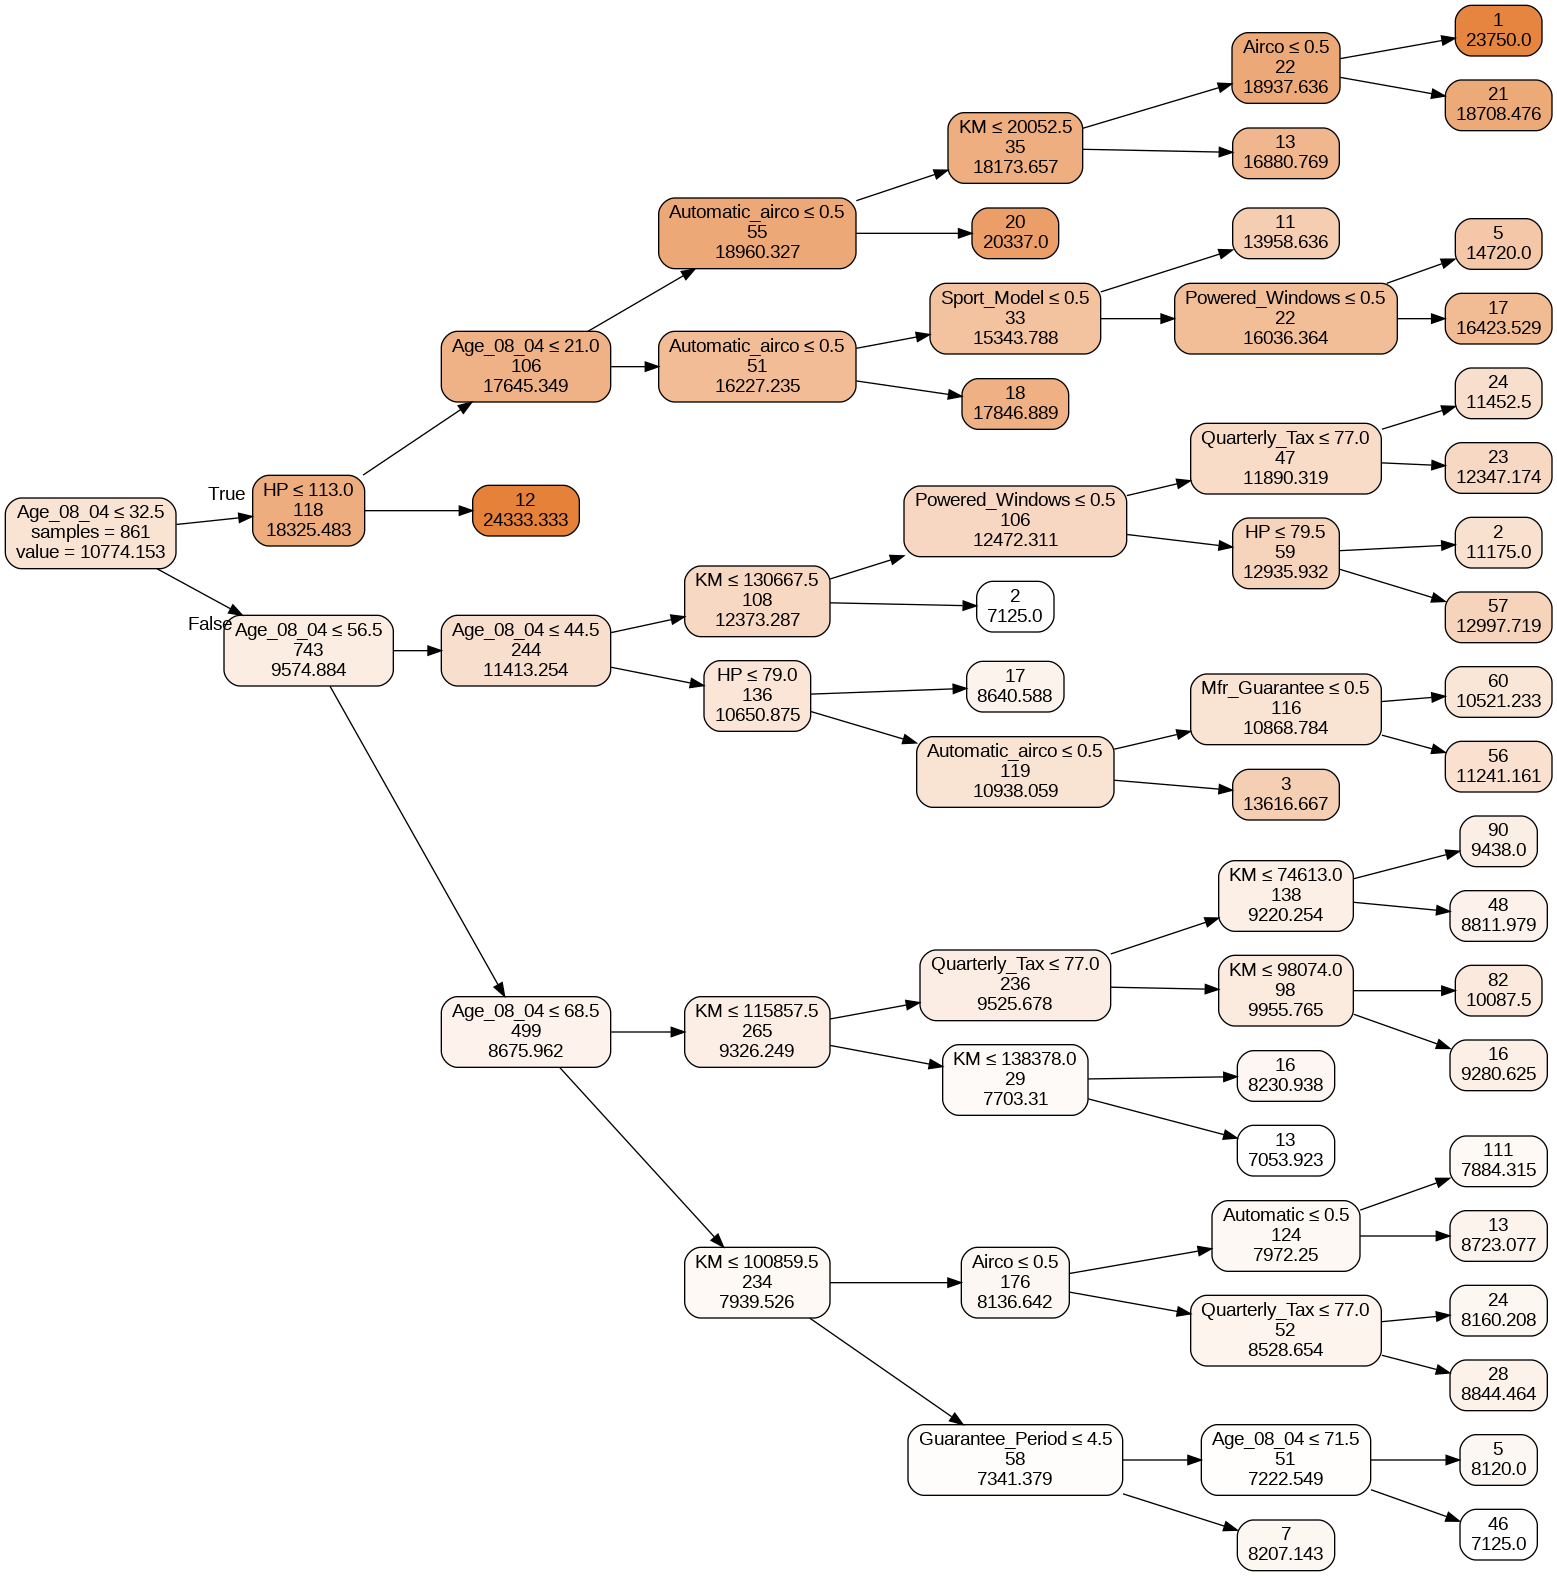

In [16]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1),
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.004, 0.005,
                              0.006, 0.007],
    'min_samples_split': [17, 18, 19, 20, 21, 22, 23],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1),
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

optRegTree = gridSearch.best_estimator_

importanceRT = pd.DataFrame({'features': train_X.columns,
                             'importance': deepTree.feature_importances_})

print('Tree has {} nodes'.format(optRegTree.tree_.node_count))
plotDecisionTree(optRegTree, feature_names=train_X.columns, rotate=True)

In [17]:
# error report for training and validation sets
print('training set:')
regressionSummary(train_y, optRegTree.predict(train_X))
print('\nvalidation set:')
regressionSummary(valid_y, optRegTree.predict(valid_X))

training set:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1100.9381
            Mean Absolute Error (MAE) : 799.4101
          Mean Percentage Error (MPE) : -1.0081
Mean Absolute Percentage Error (MAPE) : 7.6852

validation set:

Regression statistics

                      Mean Error (ME) : 23.7040
       Root Mean Squared Error (RMSE) : 1240.2015
            Mean Absolute Error (MAE) : 950.0088
          Mean Percentage Error (MPE) : -1.0616
Mean Absolute Percentage Error (MAPE) : 9.5168


__9.3.b.__ Let us see the effect of turning the price variable into a categorical variable. First, create a new variable that categorizes price into 20 bins. Now repartition the data keeping Binned_Price instead of Price. Run a classification tree with the same set of input variables as in the RT, and with Binned_Price as the output variable. As in the less deep regression tree, create a smaller tree by using GridSearchCV() with cv=5 to find a fine-tuned tree.

In [18]:
# categorical price
car_df['binned_price'] = pd.cut(car_df.Price, 20, labels=False)
print(car_df.head(5))

# separate out predictors and response
X = car_df.drop(columns=['Price', 'binned_price'])
y = car_df['binned_price']

# partition the data into training (60%) and validation (40%). Set random_state=1 for the reproducibility of results
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

   Price  Age_08_04     KM  HP  Automatic  Doors  Quarterly_Tax  \
0  13500         23  46986  90          0      3            210   
1  13750         23  72937  90          0      3            210   
2  13950         24  41711  90          0      3            210   
3  14950         26  48000  90          0      3            210   
4  13750         30  38500  90          0      3            210   

   Mfr_Guarantee  Guarantee_Period  Airco  Automatic_airco  CD_Player  \
0              0                 3      0                0          0   
1              0                 3      1                0          1   
2              1                 3      0                0          0   
3              1                 3      0                0          0   
4              1                 3      1                0          0   

   Powered_Windows  Sport_Model  Tow_Bar  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0                1            0        0              True             False  

__9.3.b.i.__ Compare the smaller tree generated by the CT with the smaller tree generated by RT. Are they different? (Look at structure, the top predictors, size of tree, etc.) Why?

__Answer:__

In [19]:
# use grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007],
    'min_samples_split': [8, 9, 10, 11, 12, 13],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

optClassTree = gridSearch.best_estimator_
importanceCT = pd.DataFrame({'features': train_X.columns,
                             'importance': optClassTree.feature_importances_})


Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 12}


Tree has 57 nodes


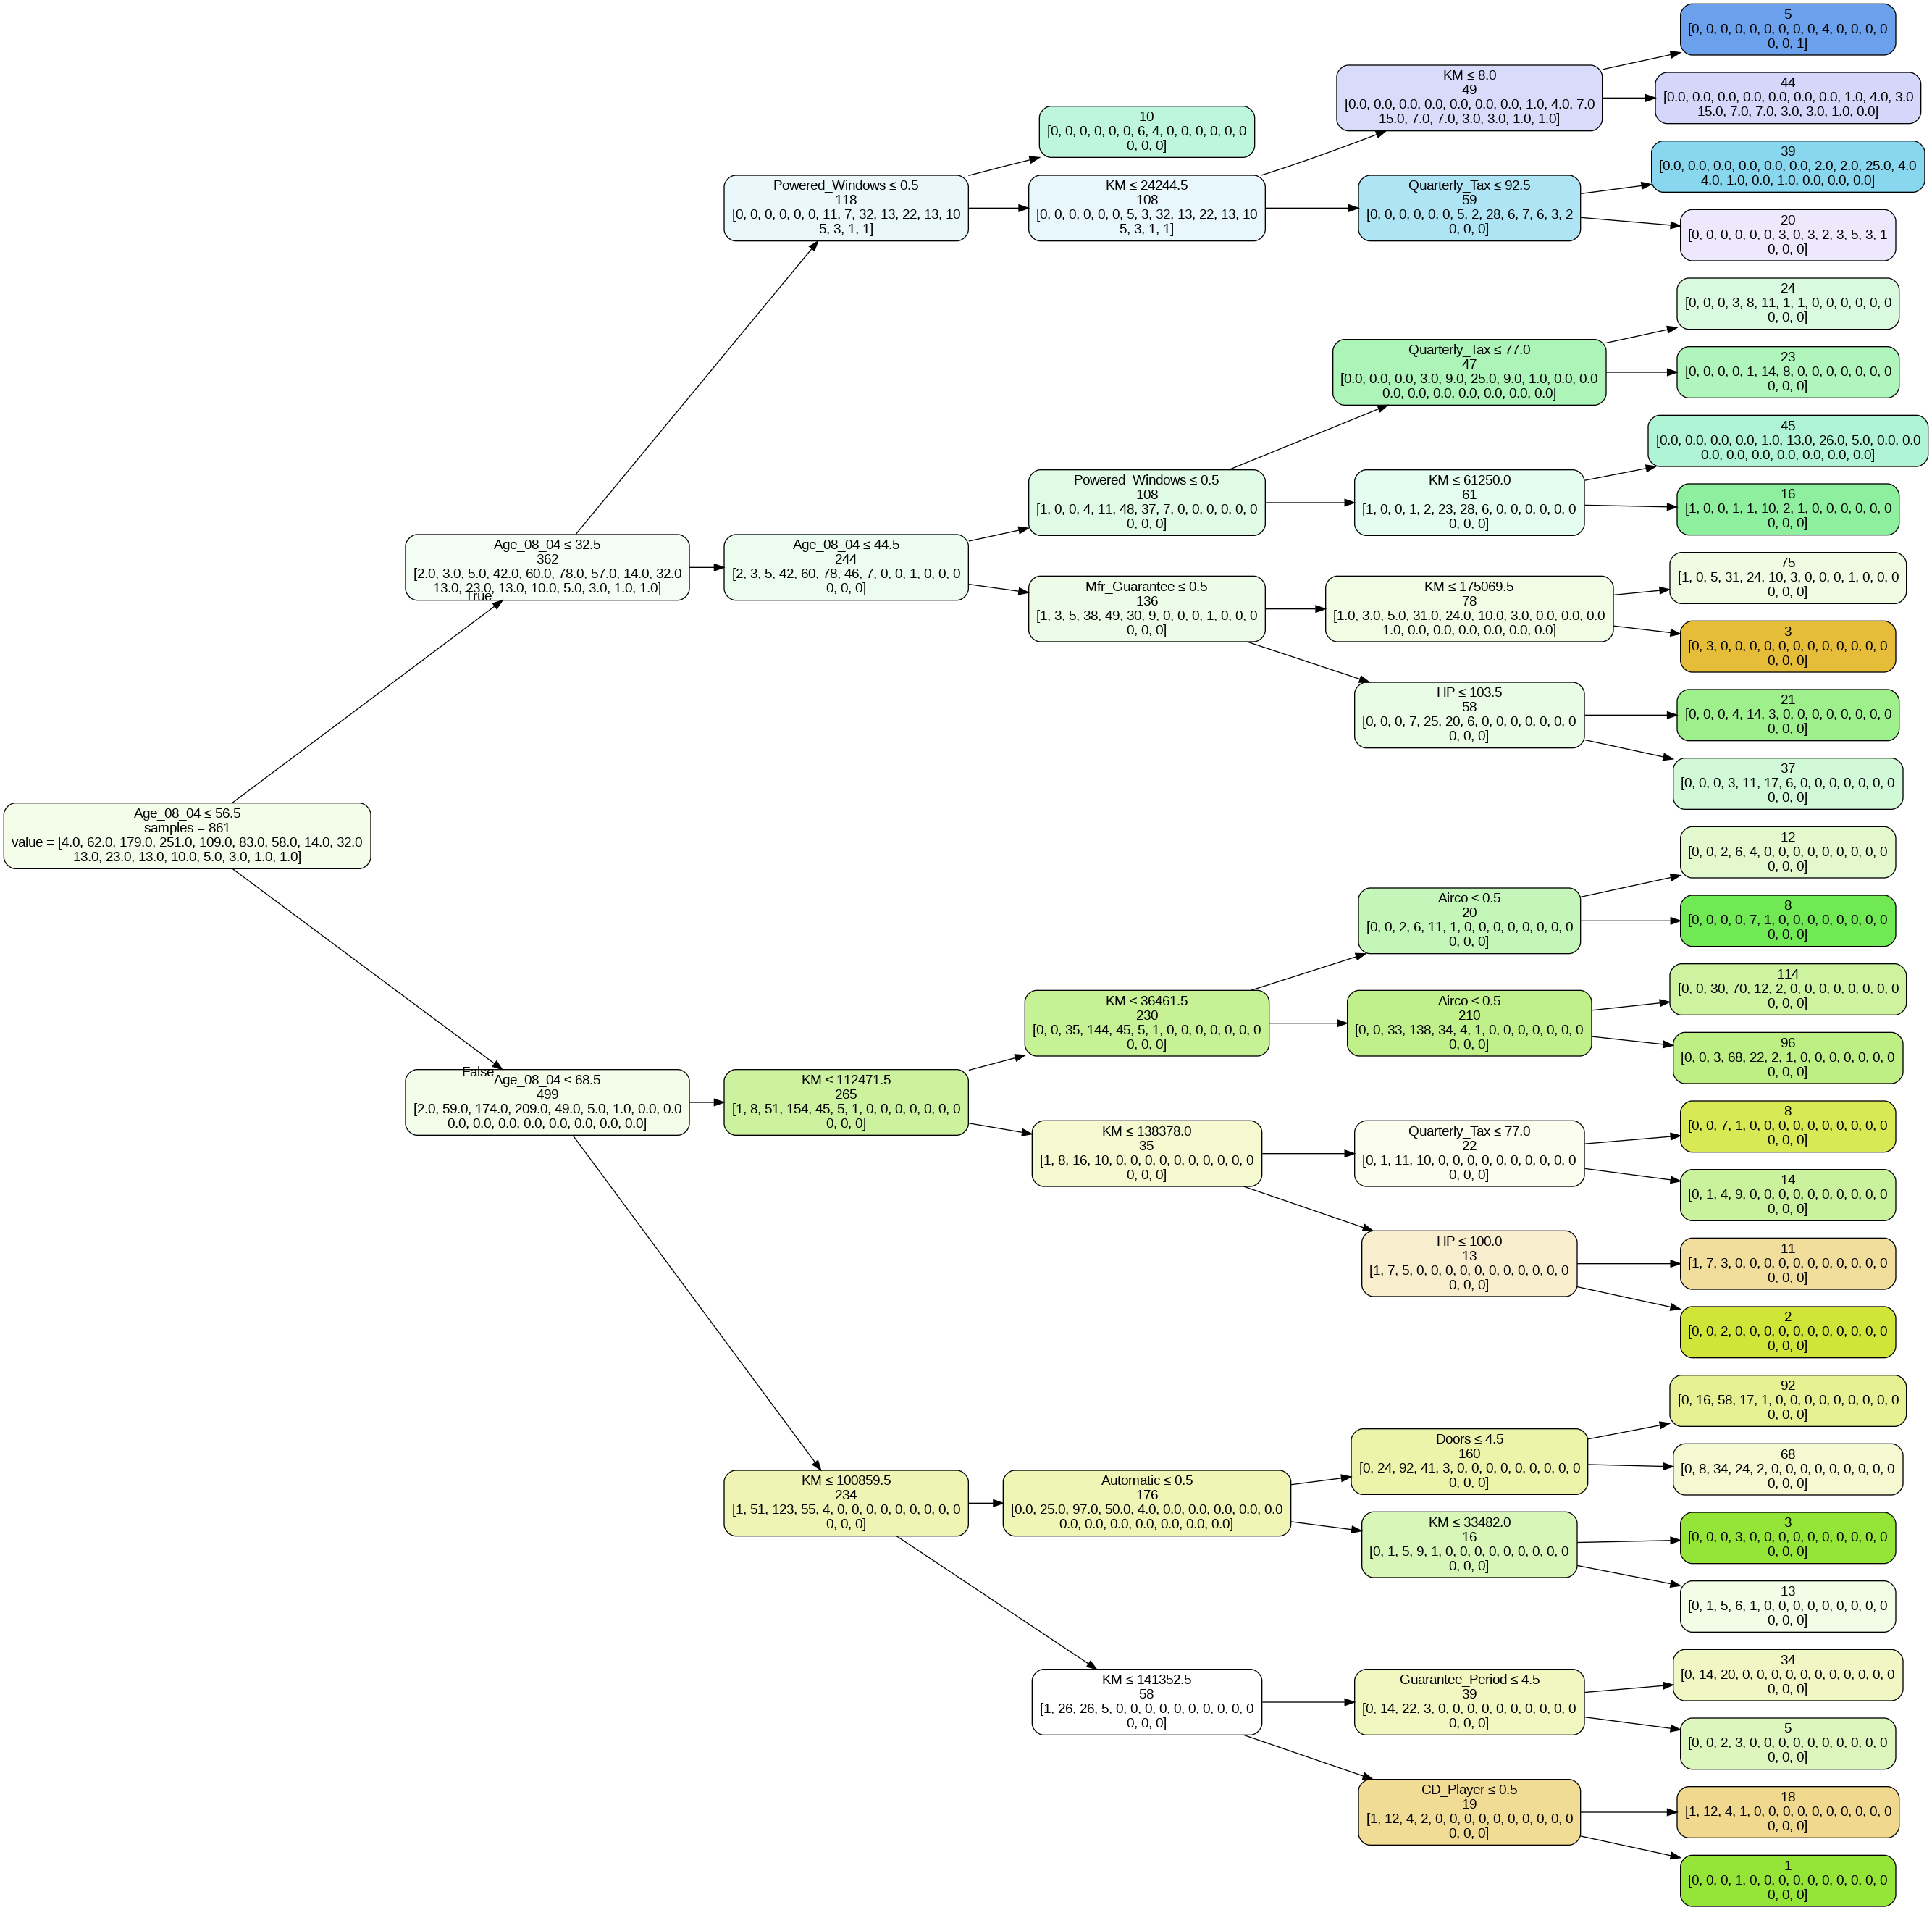

In [20]:
# plot the tree
# CT has 57 nodes, compared to RT, which has 61
print('Tree has {} nodes'.format(optClassTree.tree_.node_count))
plotDecisionTree(optClassTree, feature_names=train_X.columns, rotate=True)

In [21]:
# error report for trainig and validation sets
print('training set:')
classificationSummary(train_y, optClassTree.predict(train_X))
print('\nvalidation set:')
classificationSummary(valid_y, optClassTree.predict(valid_X))

training set:
Confusion Matrix (Accuracy 0.5738)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
     0   0   2   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
     1   0  22  38   2   0   0   0   0   0   0   0   0   0   0   0   0   0
     2   0   7 121  51   0   0   0   0   0   0   0   0   0   0   0   0   0
     3   0   1  42 197   4   7   0   0   0   0   0   0   0   0   0   0   0
     4   0   0   3  63  21  21   1   0   0   0   0   0   0   0   0   0   0
     5   0   0   0  14   4  52  13   0   0   0   0   0   0   0   0   0   0
     6   0   0   0   4   0  17  32   0   2   0   0   3   0   0   0   0   0
     7   0   0   0   0   0   2   9   0   2   0   1   0   0   0   0   0   0
     8   0   0   0   0   0   0   0   0  25   0   4   3   0   0   0   0   0
     9   0   0   0   0   0   0   0   0   4   4   3   2   0   0   0   0   0
    10   0   0   0   1   0   0   0   0   4   0  15   3   0   0   0   0   0
    11   0   0   0   0   0   0  

The accuracies for the shallow classification tree are 0.57 and 0.48.

The cross validation results suggest to pick a maximum tree depth of 5. At this depth, the accuracy on the training (0.57) and validation sets (0.48) are comparable.

In [22]:
# variable importance for regression tree
importanceRT.sort_values(by='importance', ascending=False).head(5)

,features,importance
0,Age_08_04,0.844867
2,HP,0.053789
1,KM,0.049601
9,Automatic_airco,0.013358
5,Quarterly_Tax,0.006769


In [23]:
# variable importance for classification tree
importanceCT.sort_values(by='importance', ascending=False).head(5)

,features,importance
0,Age_08_04,0.614901
1,KM,0.193525
5,Quarterly_Tax,0.043403
11,Powered_Windows,0.039055
8,Airco,0.029699


__9.3.b.ii.__ Predict the price, using the smaller RT and CT, of a used Toyota Corolla with the specifications listed in Table 9.10.

__Answer:__

In [24]:
# used car
useCar_df = pd.DataFrame([{
    'Age_08_04': 77,
    'KM': 117000,
    'HP': 110,
    'Automatic': 0,
    'Doors': 5,
    'Quarterly_Tax': 100,
    'Mfr_Guarantee': 0,
    'Guarantee_Period': 3,
    'Airco': 1,
    'Automatic_airco': 0,
    'CD_Player': 0,
    'Powered_Windows': 0,
    'Sport_Model': 0,
    'Tow_Bar': 1,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
}])



optRegTree.predict(useCar_df)

print(optClassTree.predict(useCar_df))
pd.cut(car_df.Price, 20).cat.categories[optClassTree.predict(useCar_df)]

[2]


IntervalIndex([(7165.0, 8572.5]], dtype='interval[float64, right]')

__9.3.b.iii.__ Compare the predictions in terms of the predictors that were used, the magnitude of the difference between the two predictions, and the advantages and disadvantages of the two methods.

__Answer:__

The optimal tree predicts the car price to be in bin 2 which corresponds to a price range of 7165 to 8572.

From the classification tree we get a range for the predicted price whereas the regression tree gives a predicted fixed price.

The advantage of CT is that it is simpler and therefore more robust, but you do lose accuracy by binning the price. So depending on the application, RT or CT would be selected.

For example, if your purpose were simply to set an initial sticker price at which to sell the car (i.e., estimation), RT would be a good choice. On the other hand, if your purpose were to determine whether the car falls above or below a set cutoff (say, for inclusion in an offering to a volume buyer who will not pay more than a certain amount per car), CT will focus on developing rules for that particular price point and might work better.